# K-Nearest Neighbors Classifier (KNN)

<hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv('./data/weather.csv', parse_dates=True, index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [3]:
data.index

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3337, freq=None)

In [4]:
dataset = data[['Humidity3pm','Pressure3pm','RainTomorrow']]
dataset.head()

,Humidity3pm,Pressure3pm,RainTomorrow
Date,,,
2008-02-01,84.0,1017.4,Yes
2008-02-02,73.0,1016.4,Yes
2008-02-03,86.0,1015.6,Yes
2008-02-04,90.0,1011.8,Yes
2008-02-05,74.0,1004.8,Yes


In [5]:
dataset.shape

(3337, 3)

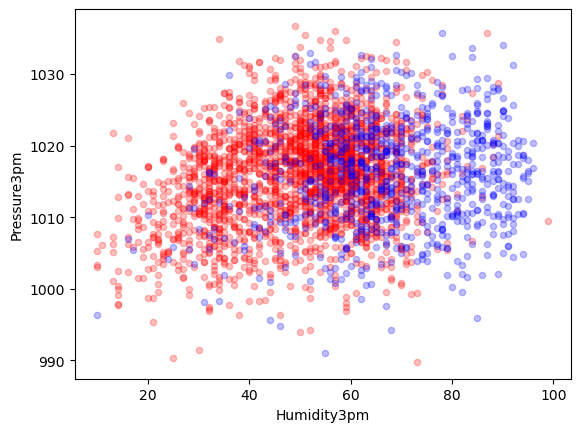

In [6]:
fig, ax = plt.subplots()

dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='r', alpha=.25,ax=ax);
dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='b', alpha=.25,ax=ax);

## Nearest Neighbors Classification

![knn](./images/knn.PNG)

## K Nearest Neighbors Classification
- It chooses the most common class out of the k nearest data points.

## Overfitting 
- A model that fit too closely to a particular dataset but fails to predict on future values.

### Some Approaches
- **Regularization:** penalizing hypothesis that are more complex to favor simpler ones
- **Holdout Cross Validation:** Split data into training and testing sets.
- **K-fold Cross Validation:** Splitting data into k sets and run k experiments with each set as test set once (using the remaining data as training set)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
dataset_clean = dataset.dropna()
len(dataset),len(dataset_clean)

(3337, 3309)

In [9]:
X = dataset_clean.drop('RainTomorrow',axis=1)
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42) 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8141993957703928

In [12]:
# if raining all the time, the accuracy score will be 26% 
sum(y)/len(y)

0.25929283771532186

In [13]:
# if raining all the time, the accuracy score will be 74%  
sum(y==0)/len(y)

0.7407071622846781

### Visualize

In [14]:
X_map = np.random.rand(10000,2)
X_map = X_map*(100,50) + (0,990)

In [15]:
X_map

array([[  33.87895521, 1030.80273072],
       [  26.79517266, 1038.44535761],
       [  52.48705161, 1006.20149735],
       ...,
       [  76.73123058, 1033.12554963],
       [  55.32617572, 1029.67925363],
       [   7.76415119,  997.31005785]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


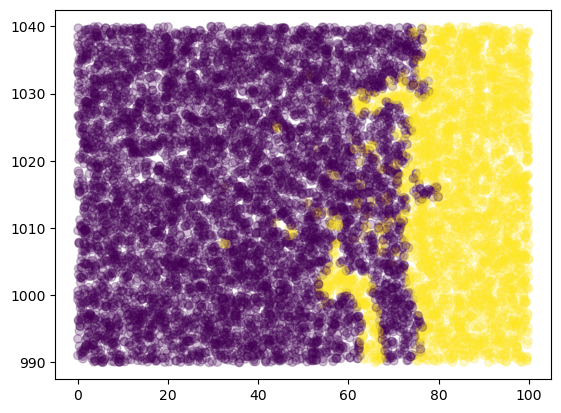

In [16]:
fig, ax = plt.subplots()

y_map = knn.predict(X_map)

ax.scatter(x=X_map[:,0],y=X_map[:,1], alpha=.25, c=y_map)

In [19]:
scores = []

for k in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42) 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

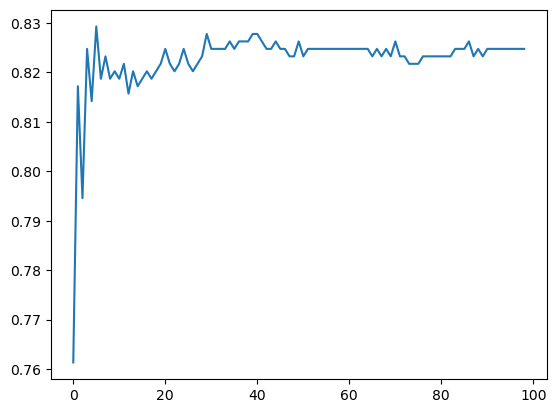

In [21]:
fig, ax = plt.subplots()
ax.plot(scores)